### Mushroom classification
##### Safe to eat or deadly posion?

Kaggle dataset: https://www.kaggle.com/uciml/mushroom-classification
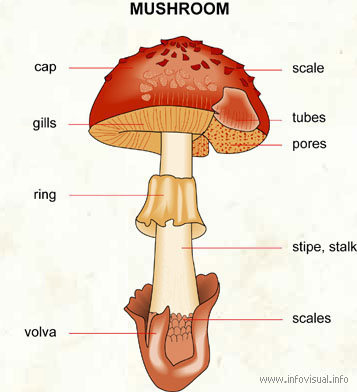

#### 23 features explained
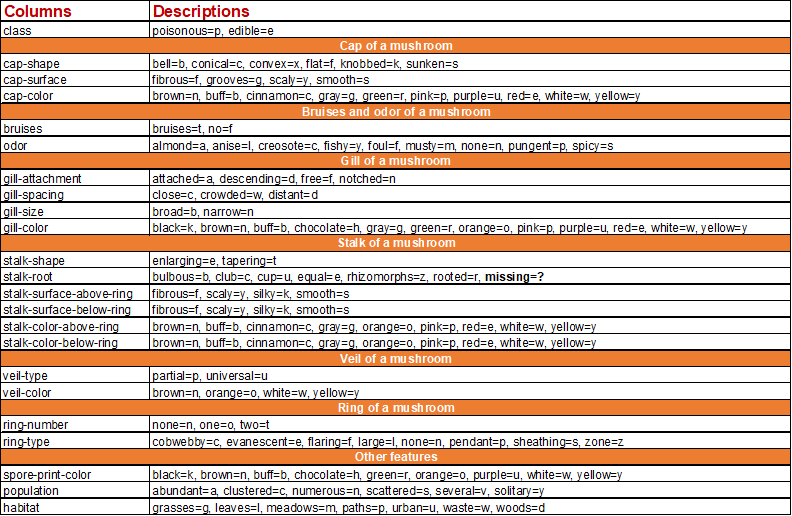

### Reading data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [3]:
data.describe().T

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

In [4]:
# basic features of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### *8124 non-null values (instances) across the dataset, all features are object type*

In [5]:
# checking unique values of each feature
data.nunique().sort_values()

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

###### Target column - is the mushroom poisonous or edible?

In [6]:
# "class" is our target column
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

###### Description of poisonous mushrooms

In [7]:
poisonous = data[data['class'] == 'p']
poisonous.describe().T

count unique top  freq
class                     3916      1   p  3916
cap-shape                 3916      5   x  1708
cap-surface               3916      4   y  1740
cap-color                 3916      8   n  1020
bruises                   3916      2   f  3292
odor                      3916      7   f  2160
gill-attachment           3916      2   f  3898
gill-spacing              3916      2   c  3804
gill-size                 3916      2   n  2224
gill-color                3916     10   b  1728
stalk-shape               3916      2   t  2016
stalk-root                3916      4   b  1856
stalk-surface-above-ring  3916      4   k  2228
stalk-surface-below-ring  3916      4   k  2160
stalk-color-above-ring    3916      6   w  1712
stalk-color-below-ring    3916      6   w  1680
veil-type                 3916      1   p  3916
veil-color                3916      2   w  3908
ring-number               3916      3   o  3808
ring-type                 3916      4   e  1768
spore-print-color         3916      5   w  1812
population                3916      4   v  2848
habitat                   3916      6   d  1268

###### Description of edible mushrooms

In [8]:
edible = data[data['class'] == 'e']
edible.describe().T

count unique top  freq
class                     4208      1   e  4208
cap-shape                 4208      5   x  1948
cap-surface               4208      3   f  1560
cap-color                 4208     10   n  1264
bruises                   4208      2   t  2752
odor                      4208      3   n  3408
gill-attachment           4208      2   f  4016
gill-spacing              4208      2   c  3008
gill-size                 4208      2   b  3920
gill-color                4208     10   w   956
stalk-shape               4208      2   t  2592
stalk-root                4208      5   b  1920
stalk-surface-above-ring  4208      4   s  3640
stalk-surface-below-ring  4208      4   s  3400
stalk-color-above-ring    4208      6   w  2752
stalk-color-below-ring    4208      6   w  2704
veil-type                 4208      1   p  4208
veil-color                4208      3   w  4016
ring-number               4208      2   o  3680
ring-type                 4208      3   p  3152
spore-print-color         4208      8   n  1744
population                4208      6   v  1192
habitat                   4208      7   d  1880

### Summary of all features

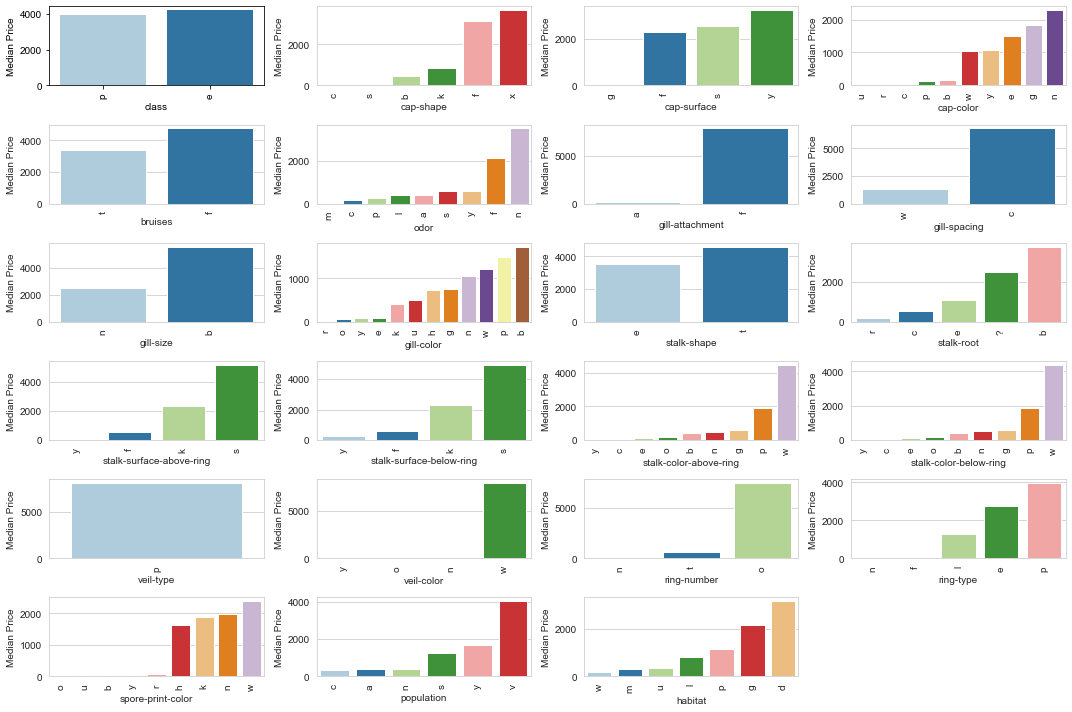

In [9]:
plt.figure(figsize=(15,10))

for i, col in enumerate(data.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = data, ax = ax, 
        order = data[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()
plt.show()

###### Veil-type as unnecessary

In [10]:
# dropping "veil-type" column as there is only one constant value "p"
data.drop(columns="veil-type", inplace = True)
data

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        s   
8123            c         b          y  ...                        s   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                           s                      w                      w   
1                           s                      w                      w   
2                           s                      w                      w   
3                           s                      w                      w   
4                           s                      w                      w   
...                       ...                    ...                    ...   
8119                        s                      o                      o   
8120                        s                      o                      o   
8121                        s                      o                      o   
8122                        k                      w                      w   
8123                        s                      o                      o   

     veil-color ring-number ring-type spore-print-color population habitat  
0             w           o         p                 k          s       u  
1             w           o         p                 n          n       g  
2             w           o         p                 n          n       m  
3             w           o         p                 k          s       u  
4             w           o         e                 n          a       g  
...         ...         ...       ...               ...        ...     ...  
8119          o           o         p                 b          c       l  
8120          n           o         p                 b          v       l  
8121          o           o         p                 b          c       l  
8122          w           o         e                 w          v       l  
8123          o           o         p                 o          c       l  

[8124 rows x 22 columns]

## Charts for key features

### Cap-related features:
* Shape and surface
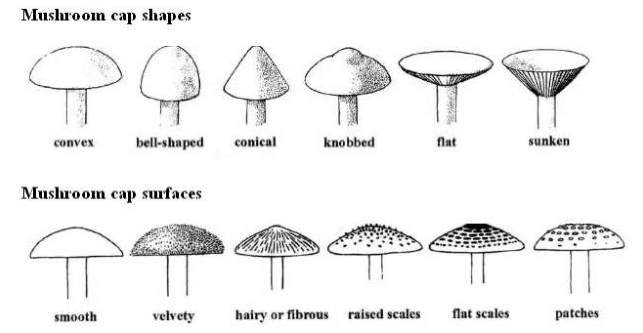

###### Cap shape

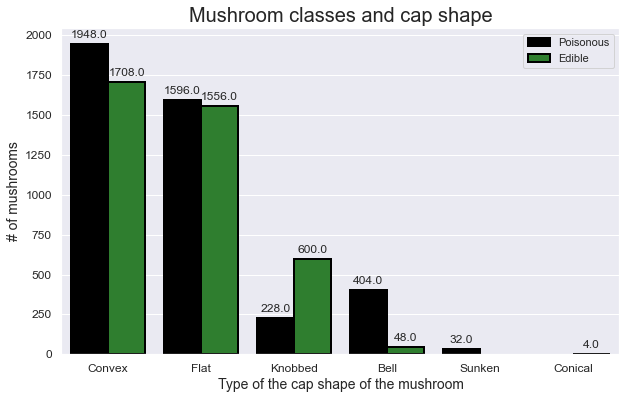

In [93]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-shape',
                      hue='class',
                      order=data['cap-shape'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Type of the cap shape of the mushroom', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes and cap shape', fontsize=20)
pass

###### Cap surface

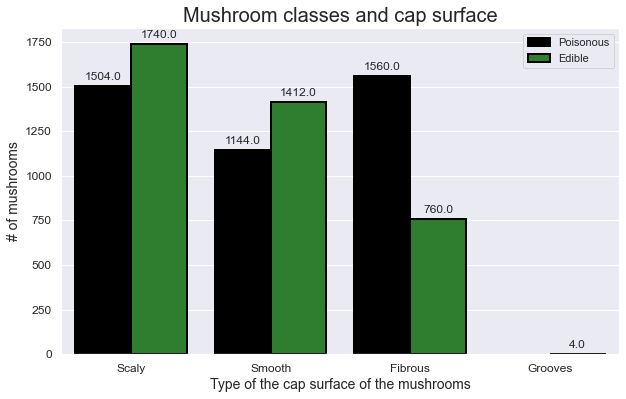

In [92]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-surface',
                      hue='class',
                      order=data['cap-surface'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Type of the cap surface of the mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes and cap surface', fontsize=20)
pass

###### Cap color

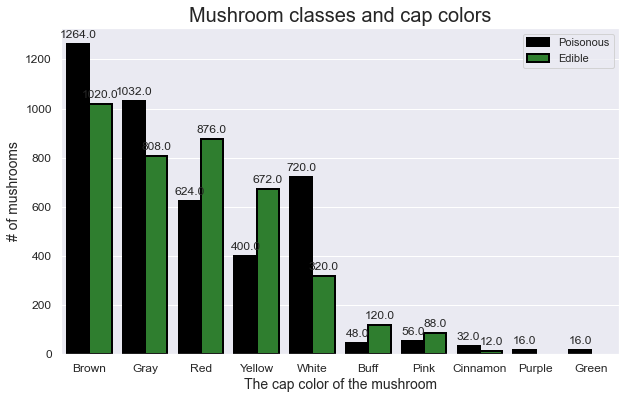

In [91]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='cap-color',
                      hue='class',
                      order=data['cap-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 
                       'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('The cap color of the mushroom', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes and cap colors', fontsize=20)
pass

###### Bruises

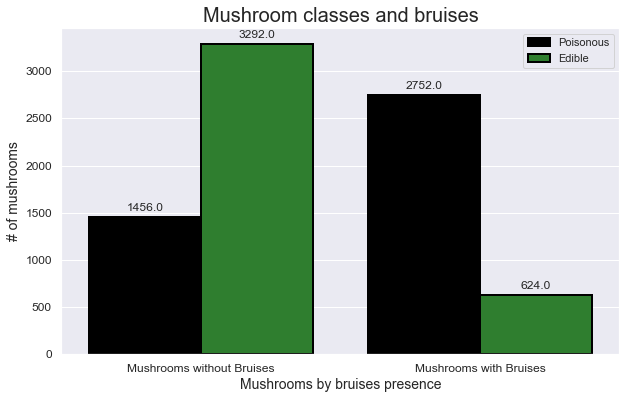

In [90]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='bruises',
                      hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Mushrooms by bruises presence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes and bruises', fontsize=20)
pass

###### Odor

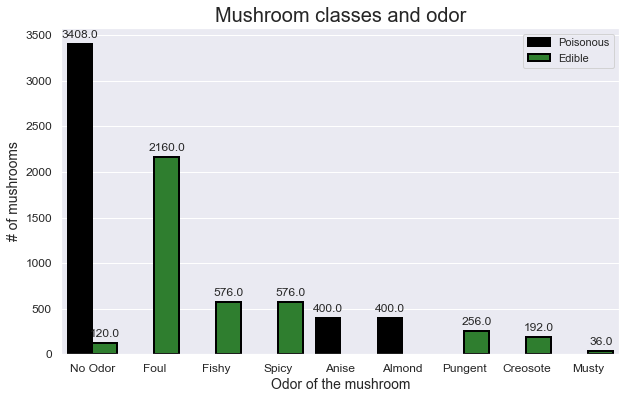

In [89]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='odor',
                      hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Odor of the mushroom', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes and odor', fontsize=20)
pass

### Gill-related features:
###### Attachement
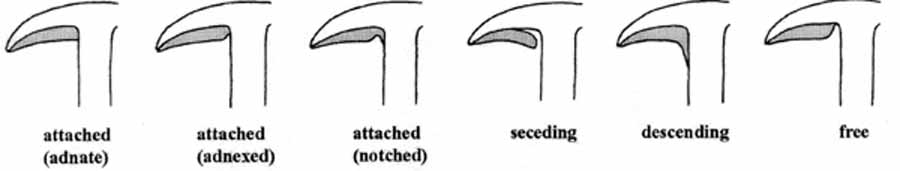

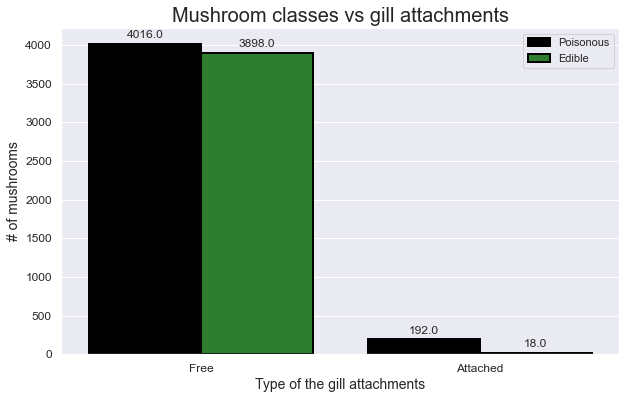

In [87]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-attachment',
                      hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Type of the gill attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs gill attachments', fontsize=20)
pass

###### Gill spacing
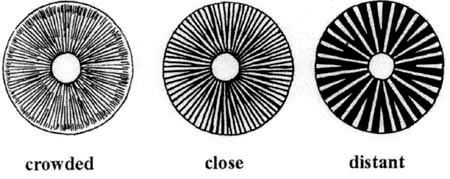

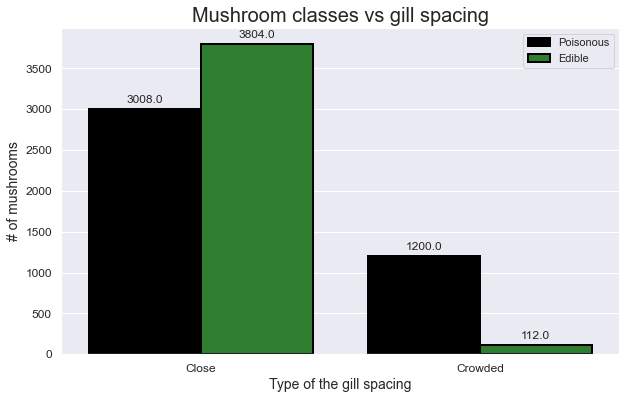

In [85]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-spacing',
                      hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Type of the gill spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs gill spacing', fontsize=20)
pass

###### Gill color

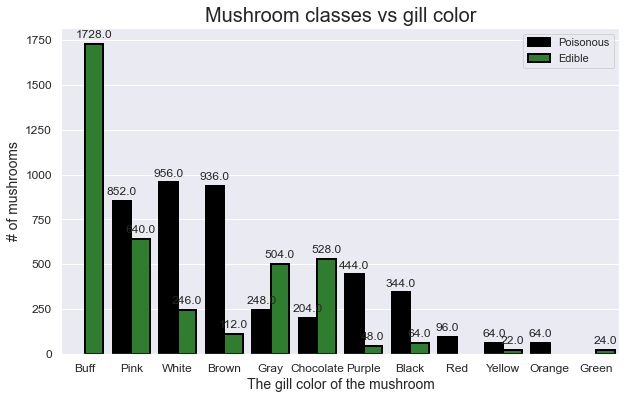

In [83]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='gill-color',
                      hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 
                       'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('The gill color of the mushroom', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs gill color', fontsize=20)
pass

### Stalk-related features:
###### Root
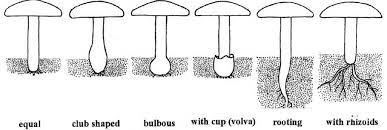

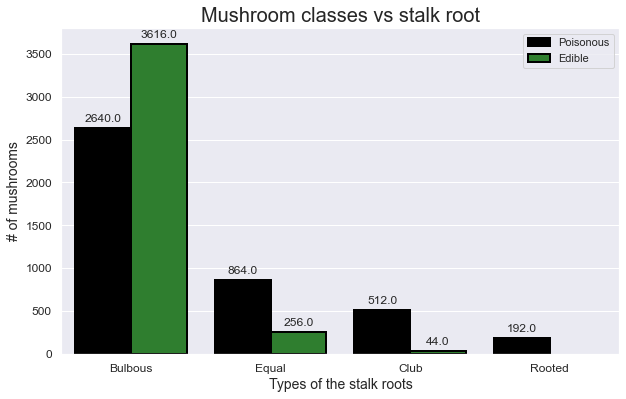

In [81]:
data = data.replace(['?'], 'b')
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-root',
                      hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2
                      )

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the stalk roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs stalk root', fontsize=20)
pass

###### Stalk shape

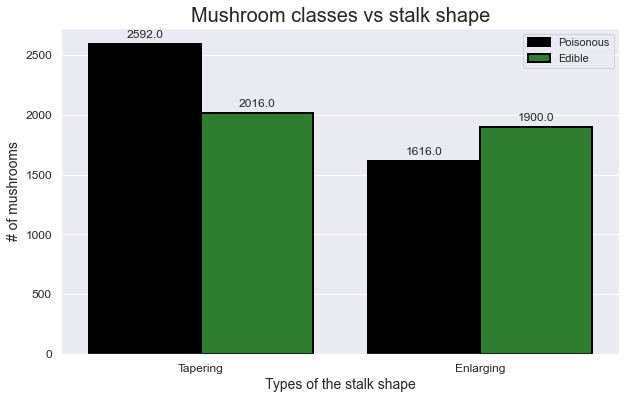

In [80]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-shape',
                      hue='class',
                      order=data['stalk-shape'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarging'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the stalk shape', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs stalk shape', fontsize=20)
pass

###### Stalk surface above ring

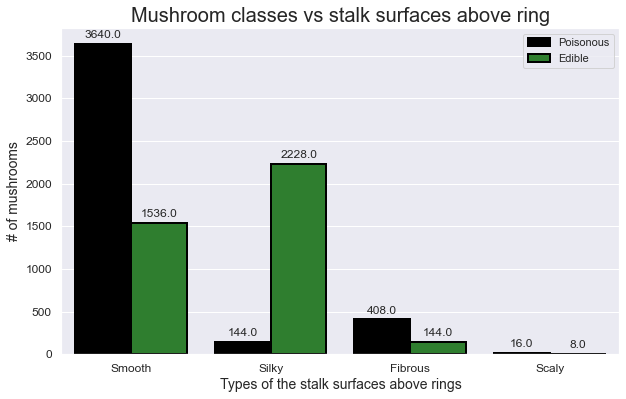

In [79]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-surface-above-ring',
                      hue='class',
                      order=data['stalk-surface-above-ring'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the stalk surfaces above rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs stalk surfaces above ring', fontsize=20)
pass

###### Stalk surface below ring

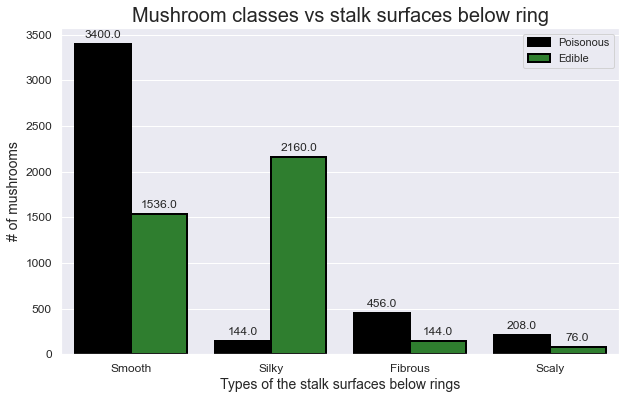

In [78]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='stalk-surface-below-ring',
                      hue='class',
                      order=data['stalk-surface-below-ring'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Types of the stalk surfaces below rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs stalk surfaces below ring', fontsize=20)
pass

### Veil-related features
###### Veil type
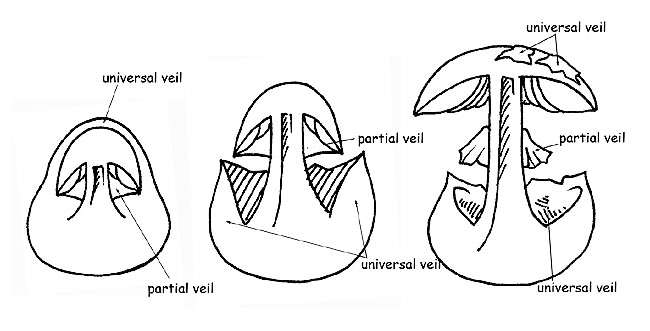

###### Veil color

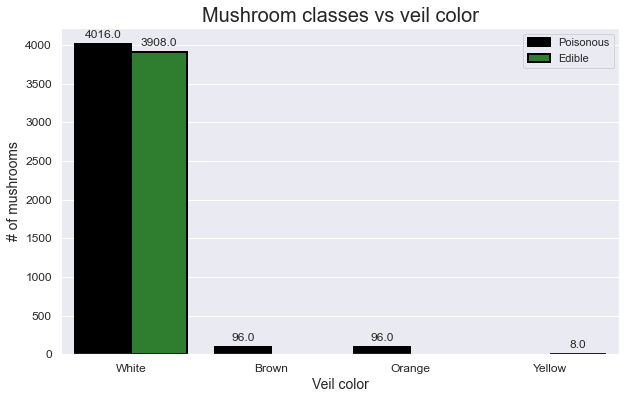

In [77]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='veil-color',
                      hue='class',
                      order=data['veil-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Veil color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs veil color', fontsize=20)
pass

### Ring-related features
###### Ring type 
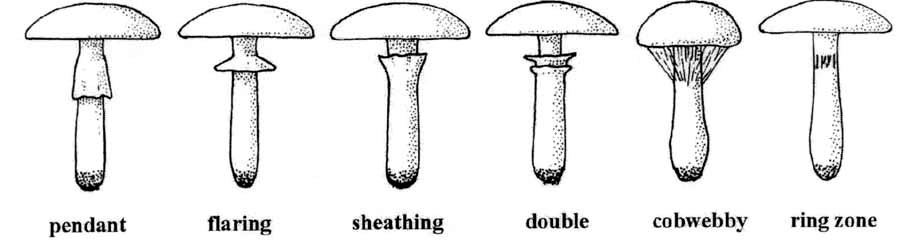

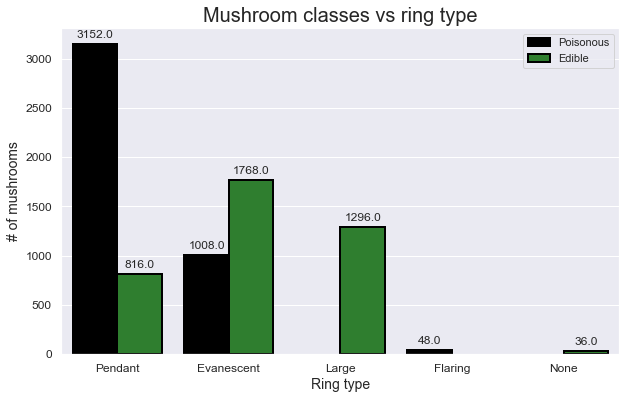

In [76]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='ring-type',
                      hue='class',
                      order=data['ring-type'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Ring type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs ring type', fontsize=20)
pass

### Spore print
###### Color
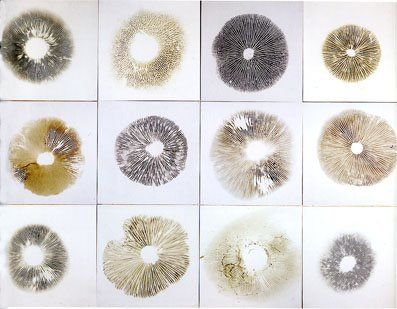

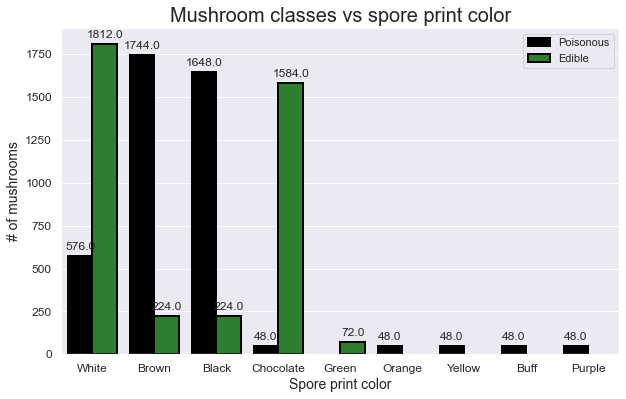

In [75]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='spore-print-color',
                      hue='class',
                      order=data['spore-print-color'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Spore print color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs spore print color', fontsize=20)
pass

### Population
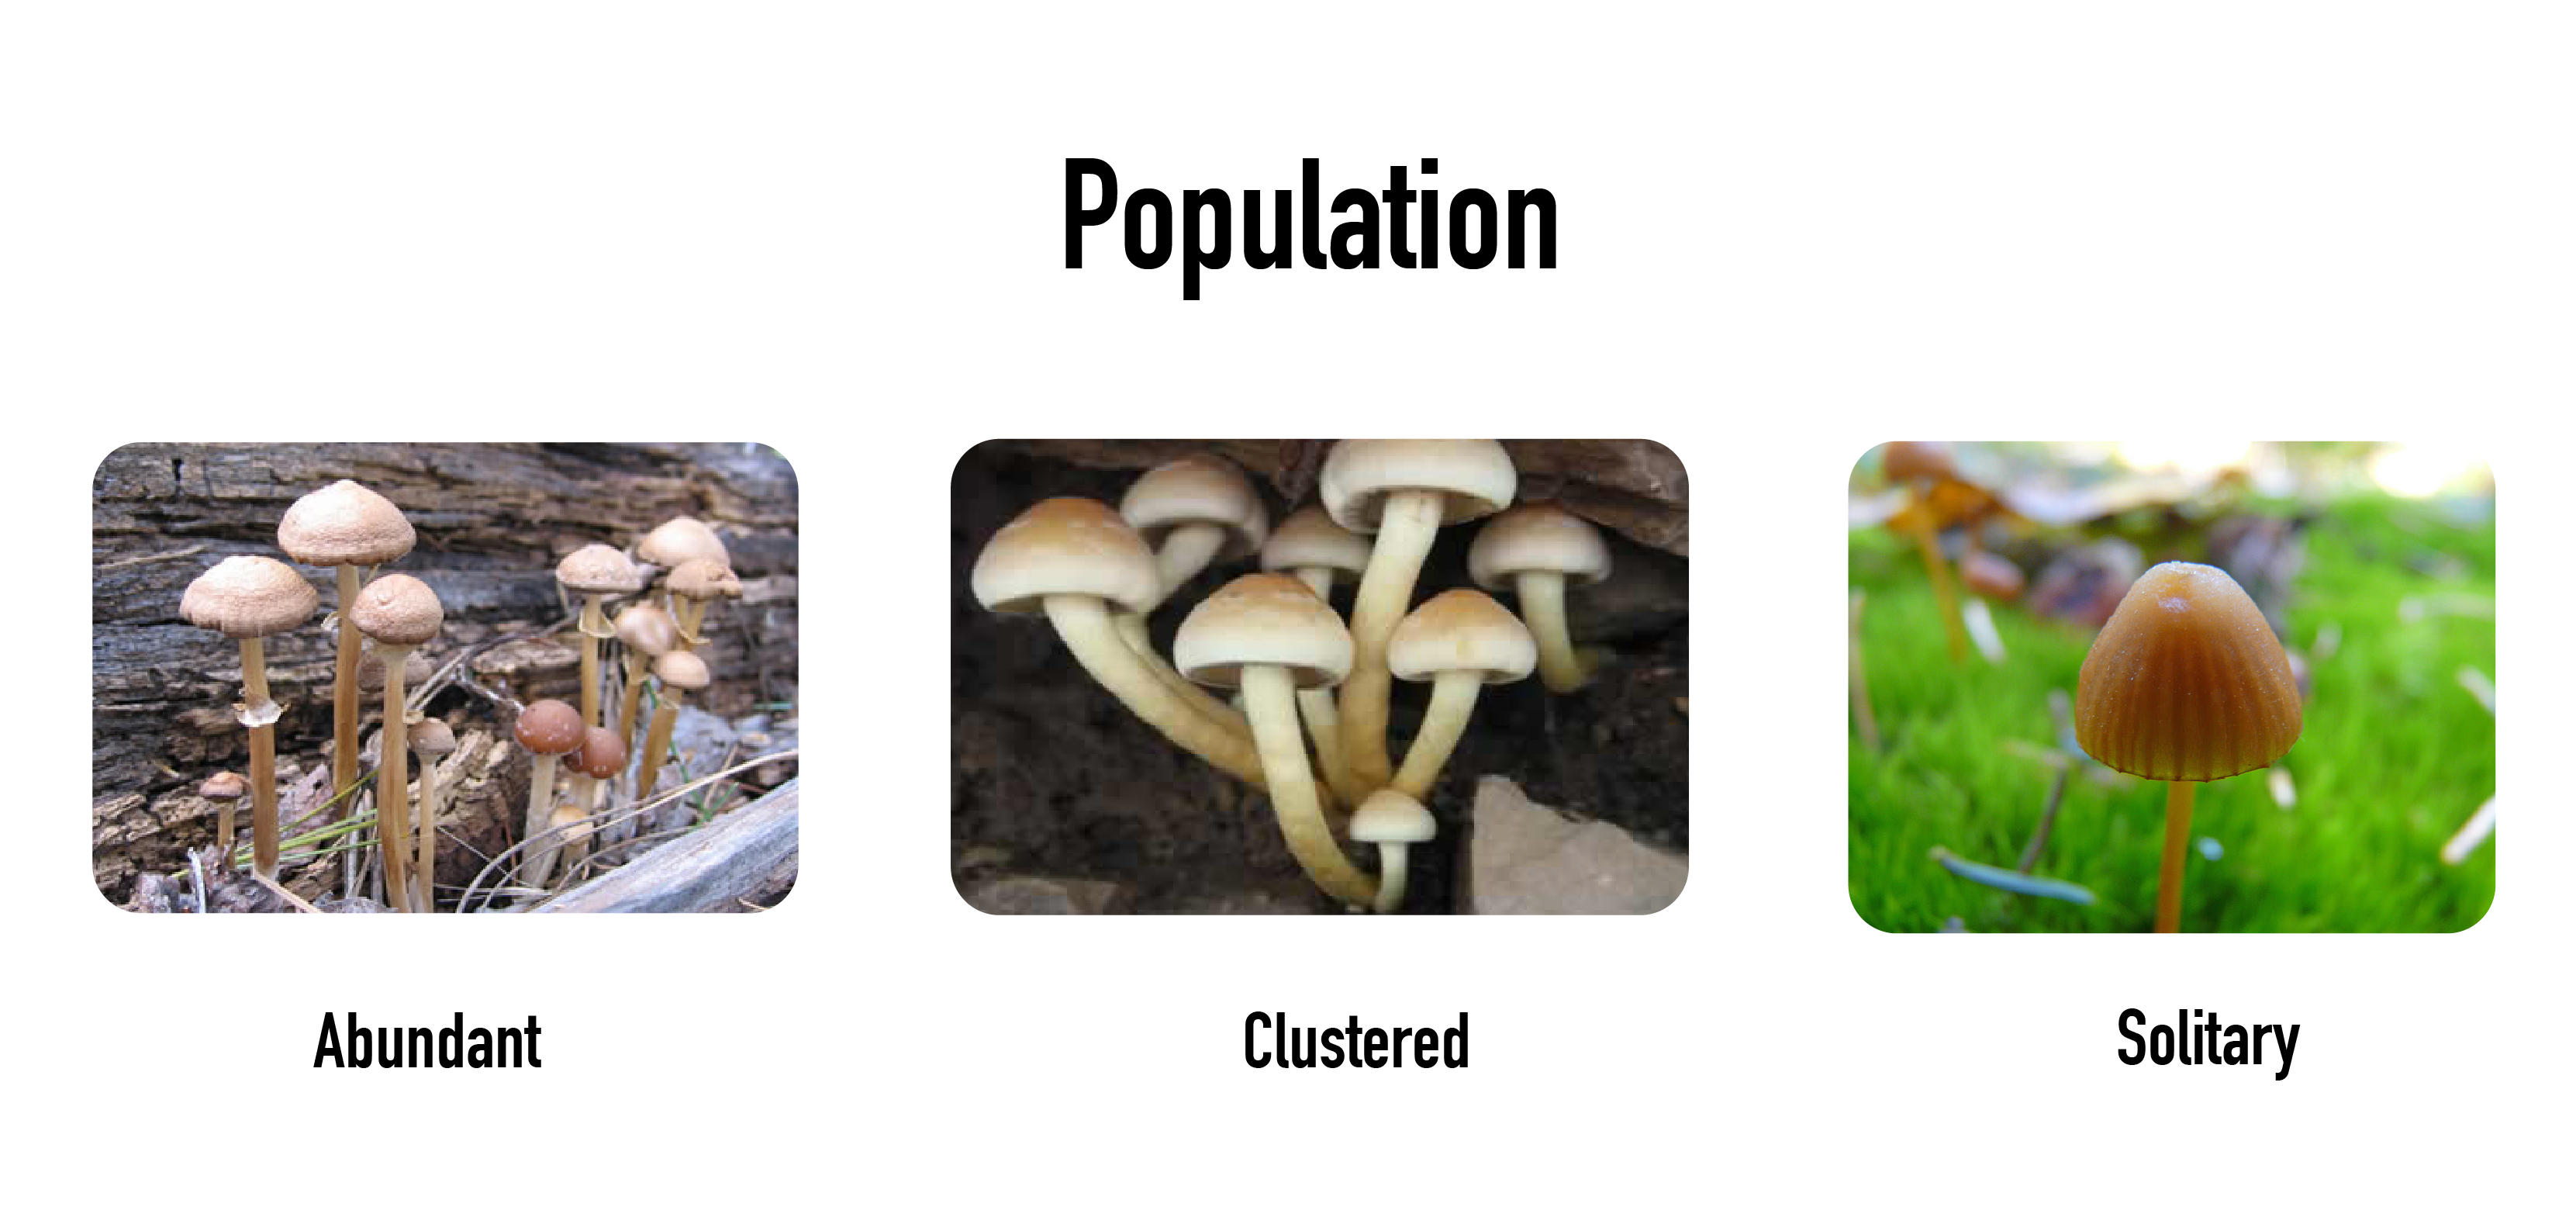

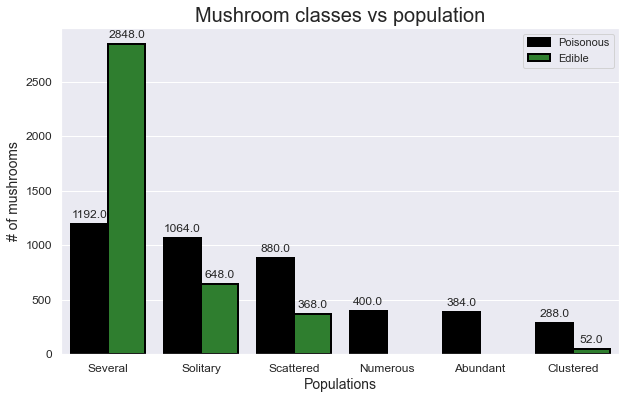

In [74]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='population',
                      hue='class',
                      order=data['population'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushroom classes vs population', fontsize=20)
pass

###### Habitat

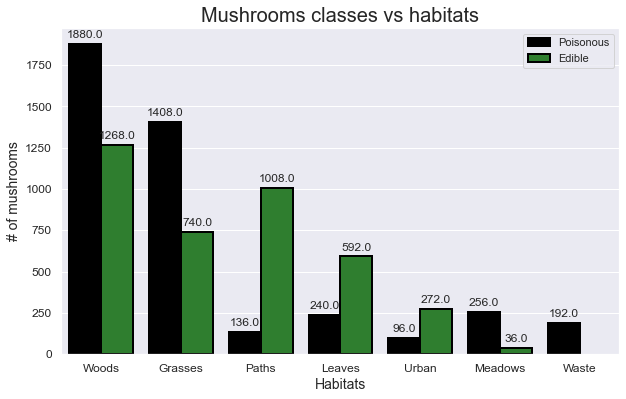

In [73]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(data=data, x='habitat',
                      hue='class',
                      order=data['habitat'].value_counts().index,
                      palette=['black', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('# of mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushrooms classes vs habitats', fontsize=20)
pass

# Data pre-processing

###### Encoding data

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#label encoder to convert words into numbers

le = LabelEncoder()
for col in list(data.columns):
    data[col] = le.fit_transform(data[col])

In [43]:
data.describe().round(2).T

count  mean   std  min  25%  50%  75%   max
class                     8124.0  0.48  0.50  0.0  0.0  0.0  1.0   1.0
cap-shape                 8124.0  3.35  1.60  0.0  2.0  3.0  5.0   5.0
cap-surface               8124.0  1.83  1.23  0.0  0.0  2.0  3.0   3.0
cap-color                 8124.0  4.50  2.55  0.0  3.0  4.0  8.0   9.0
bruises                   8124.0  0.42  0.49  0.0  0.0  0.0  1.0   1.0
odor                      8124.0  4.14  2.10  0.0  2.0  5.0  5.0   8.0
gill-attachment           8124.0  0.97  0.16  0.0  1.0  1.0  1.0   1.0
gill-spacing              8124.0  0.16  0.37  0.0  0.0  0.0  0.0   1.0
gill-size                 8124.0  0.31  0.46  0.0  0.0  0.0  1.0   1.0
gill-color                8124.0  4.81  3.54  0.0  2.0  5.0  7.0  11.0
stalk-shape               8124.0  0.57  0.50  0.0  0.0  1.0  1.0   1.0
stalk-root                8124.0  0.42  0.81  0.0  0.0  0.0  0.0   3.0
stalk-surface-above-ring  8124.0  1.58  0.62  0.0  1.0  2.0  2.0   3.0
stalk-surface-below-ring  8124.0  1.60  0.68  0.0  1.0  2.0  2.0   3.0
stalk-color-above-ring    8124.0  5.82  1.90  0.0  6.0  7.0  7.0   8.0
stalk-color-below-ring    8124.0  5.79  1.91  0.0  6.0  7.0  7.0   8.0
veil-color                8124.0  1.97  0.24  0.0  2.0  2.0  2.0   3.0
ring-number               8124.0  1.07  0.27  0.0  1.0  1.0  1.0   2.0
ring-type                 8124.0  2.29  1.80  0.0  0.0  2.0  4.0   4.0
spore-print-color         8124.0  3.60  2.38  0.0  2.0  3.0  7.0   8.0
population                8124.0  3.64  1.25  0.0  3.0  4.0  4.0   5.0
habitat                   8124.0  1.51  1.72  0.0  0.0  1.0  2.0   6.0

###### "Class" is a target column - we have to drop it

In [37]:
X = data.drop('class', axis=1)
y = data['class']
X.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   
2                         2                         2                       7   
3                         2                         2                       7   
4                         2                         2                       7   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                       7           2            1          4   
1                       7           2            1          4   
2                       7           2            1          4   
3                       7           2            1          4   
4                       7           2            1          0   

   spore-print-color  population  habitat  
0                  2           3        5  
1                  3           2        1  
2                  3           2        3  
3                  2           3        5  
4                  3           0        1  

[5 rows x 21 columns]

### Correlation matrix

<AxesSubplot:>

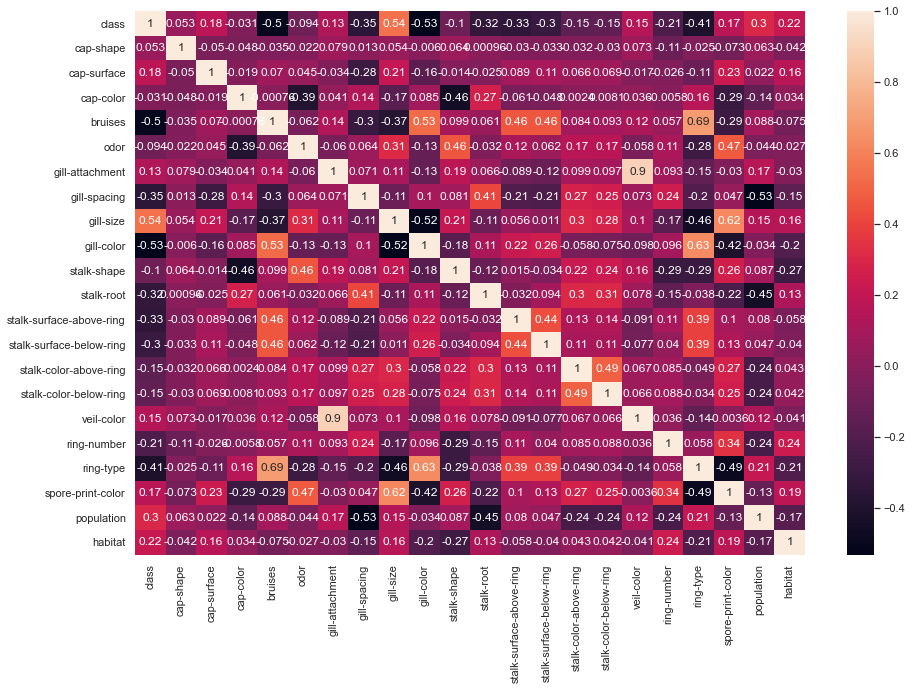

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True)